<a href="https://colab.research.google.com/github/Chahd-TB/Neural-Networks-for-Handwritten-Digit-Recognition/blob/main/Neural_Networks_Part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practice Lab: Neural Networks for Handwritten Digit Recognition (Multiclass classification)

In this exercise, you will use a neural network to recognize the hand-written digits.


# Outline
- [ 1 - Setup & Packages ](#1)
- [ 2 - Neural Networks](#2)
  - [ 2.1 Problem Statement](#2.1)
  - [ 2.2 Dataset](#2.2)
  - [ 2.3 Model representation](#2.3)
  - [ 2.4 Tensorflow Model Implementation](#2.4)
    - [ Exercise 1](#ex01)
    - [ Exercise 2](#ex02)
    - [ Exercise 3](#ex03)
  - [ 2.5 Pytorch Model Implementation ](#2.5)
    - [ Exercise 4](#ex04)
    - [ Exercise 5](#ex05)
    - [ Exercise 6](#ex06)
  - [ 2.6 NumPy Model Implementation (Forward Prop in NumPy)](#2.6)
    - [ Exercise 7](#ex07)
    - [ Exercise 8](#ex08)



<a name="1"></a>
# 1 -  Setup and Packages

Before starting, make sure to mount your Google Drive and navigate to the correct directory where this notebook is located. This ensures you can access the dataset and utility libraries.

**Step 1: Mount Google Drive**

Run the following code to mount your Google Drive:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Step 2: Navigate to the Notebook's Directory**

Change to the directory where this notebook is located. This ensures you can access the dataset and utility files:

In [ ]:
cd "/content/drive/MyDrive/Lab4_ Neural_Networks/"

/content/drive/MyDrive/Lab4_ Neural_Networks


**Step 3: Import Required Packages**

Next, let's run the cell below to import all the packages that you will need during this assignment.
- [numpy](https://numpy.org/) is the fundamental package for scientific computing with Python.
- [matplotlib](http://matplotlib.org) is a popular library to plot graphs in Python.
- [tensorflow](https://www.tensorflow.org/) a popular platform for machine learning.

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

**Tensorflow vs Keras**  
Tensorflow is a machine learning package developed by Google. In 2019, Google integrated Keras into Tensorflow and released Tensorflow 2.0. Keras is a framework developed independently by François Chollet that creates a simple, layer-centric interface to Tensorflow.

<a name="2"></a>
## 2 - Neural Networks

In last weeks assignment, you implemented a neural network to do binary classification. This week you will extend that to multiclass classification. This will utilize the softmax activation.

<a name="2.1"></a>
### 2.1 Problem Statement

In this exercise, you will use a neural network to recognize ten handwritten digits, 0-9. This is a multiclass classification task where one of n choices is selected. Automated handwritten digit recognition is widely used today - from recognizing zip codes (postal codes) on mail envelopes to recognizing amounts written on bank checks.

<a name="2.2"></a>
### 2.2 Dataset


You will start by loading the dataset for this task.
- The `load_data()` function shown below loads the data into variables `X` and `y`


- The data set contains 5000 training examples of handwritten digits $^1$.  

    - Each training example is a 20-pixel x 20-pixel grayscale image of the digit.
        - Each pixel is represented by a floating-point number indicating the grayscale intensity at that location.
        - The 20 by 20 grid of pixels is “unrolled” into a 400-dimensional vector.
        - Each training examples becomes a single row in our data matrix `X`.
        - This gives us a 5000 x 400 matrix `X` where every row is a training example of a handwritten digit image.

$$X =
\left(\begin{array}{cc}
--- (x^{(1)}) --- \\
--- (x^{(2)}) --- \\
\vdots \\
--- (x^{(m)}) ---
\end{array}\right)$$

- The second part of the training set is a 5000 x 1 dimensional vector `y` that contains labels for the training set
    - `y = 0` if the image is of the digit `0`, `y = 4` if the image is of the digit `4` and so on.

$^1$<sub> This is a subset of the MNIST handwritten digit dataset (http://yann.lecun.com/exdb/mnist/)</sub>

In [ ]:
def load_data():
    X = np.load("data/X_m.npy")
    y = np.load("data/y_m.npy")
    return X, y

In [ ]:
# load dataset
X, y = load_data()

**View the variables**
Let's get more familiar with your dataset.  
- A good place to start is to print out each variable and see what it contains.

The code below prints elements of the variables `X` and `y`.  

In [ ]:
print ('The first element of X is: ', X[0])

The first element of X is:  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+

In [ ]:
print ('The first element of y is: ', y[0,0])
print ('The last element of y is: ', y[-1,0])

The first element of y is:  0
The last element of y is:  9


In [ ]:
print ('The first element of y is: ', y[0]) # we get an array 1x1
print ('The last element of y is: ', y[-1]) # we get an array 1x1

The first element of y is:  [0]
The last element of y is:  [9]


**Check the dimensions of your variables**

Another way to get familiar with your data is to view its dimensions. Please print the shape of `X` and `y` and see how many training examples you have in your dataset.

In [ ]:
print ('The shape of X is: ' , X.shape)
print ('The shape of y is: ' , y.shape)

The shape of X is:  (5000, 400)
The shape of y is:  (5000, 1)


**Visualizing the Data**

You will begin by visualizing a subset of the training set.
- In the cell below, the code randomly selects 64 rows from `X`, maps each row back to a 20 pixel by 20 pixel grayscale image and displays the images together.
- The label for each image is displayed above the image

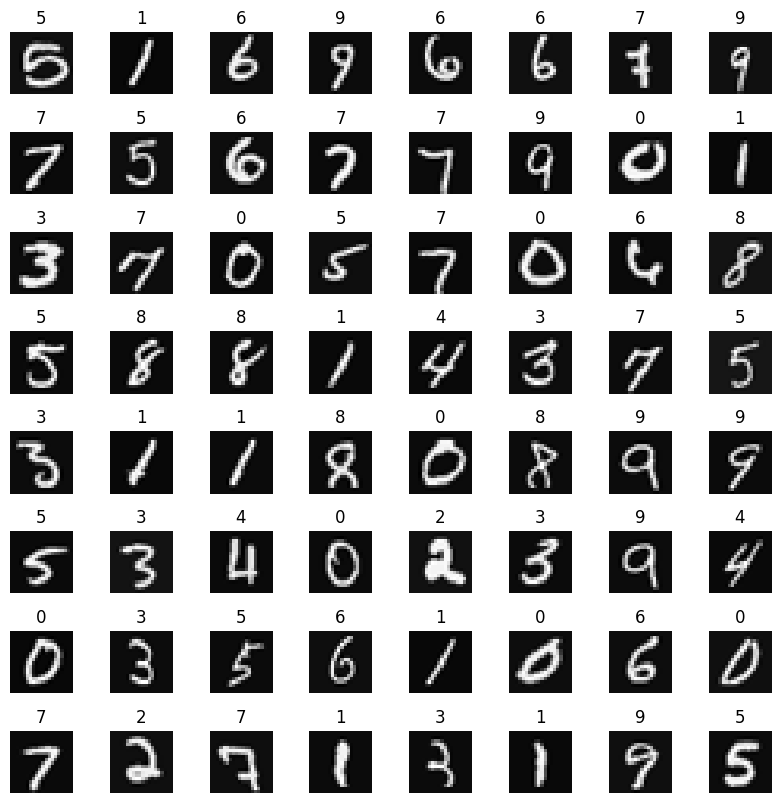

In [ ]:
m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1)

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)

    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T

    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')

    # Display the label above the image
    ax.set_title(y[random_index,0])
    ax.set_axis_off()

<a name="2.3"></a>
### 2.3 Model representation


The neural network you will use in this assignment is shown in the figure below.
- This has two dense layers with ReLU activations followed by an output layer with a linear activation.
    - Recall that our inputs are pixel values of digit images.
    - Since the images are of size $20\times20$, this gives us $400$ inputs.

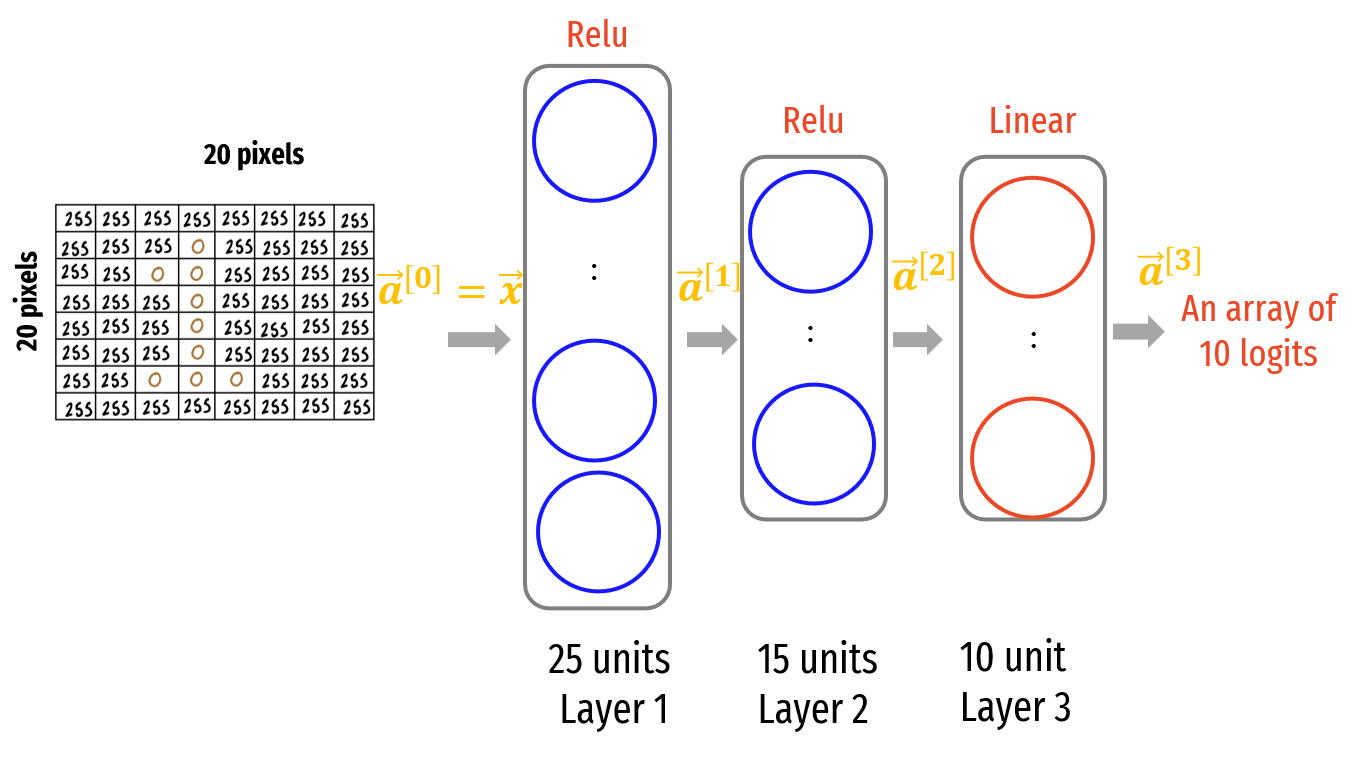

- The parameters have dimensions that are sized for a neural network with $25$ units in layer 1, $15$ units in layer 2 and $10$ output units in layer 3, one for each digit.

    - Recall that the dimensions of these parameters is determined as follows:
        - If network has $s_{in}$ units in a layer and $s_{out}$ units in the next layer, then
            - $W$ will be of dimension $s_{in} \times s_{out}$.
            - $b$ will be a vector with $s_{out}$ elements
  
    - Therefore, the shapes of `W`, and `b`,  are
        - layer1: The shape of `W1` is (400, 25) and the shape of `b1` is (25,)
        - layer2: The shape of `W2` is (25, 15) and the shape of `b2` is: (15,)
        - layer3: The shape of `W3` is (15, 10) and the shape of `b3` is: (10,)
>**Note:** The bias vector `b` could be represented as a 1-D (n,) or 2-D (n,1) array. Tensorflow utilizes a 1-D representation and this lab will maintain that convention:
               

<a name="2.4"></a>

### 2.4 Tensorflow Model Implementation

It is widely known that numerical stability is improved if the softmax is grouped with the loss function rather than the output layer during training. This has implications when *building* the model and *using* the model.  
Building:  
* The final Dense layer should use a 'linear' activation. This is effectively no activation.
* The `model.compile` statement will indicate this by including `from_logits=True`.
`loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) `  
* This does not impact the form of the target. In the case of SparseCategorialCrossentropy, the target is the expected digit, 0-9.

Using the model:
* The outputs are not probabilities. If output probabilities are desired, apply a softmax function.

<a name="ex01"></a>
### Exercise 1

Construct the network described above.

In [ ]:
modelTF = Sequential(
    [
        tf.keras.Input(shape=(400,)),    #specify input size
        ### START CODE HERE ###
        tf.keras.layers.Dense(25, activation='relu', name='layer1'),
        tf.keras.layers.Dense(15, activation='relu', name='layer2'),
        tf.keras.layers.Dense(10, activation='linear', name='layer3')
        ### END CODE HERE ###
    ], name = "my_model"
)

In [ ]:
modelTF.summary()

Model: "my_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 25)             │        10,025 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 15)             │           390 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer3 (Dense)                  │ (None, 10)             │           160 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,575 (41.31 KB)

 Trainable params: 10,575 (41.31 KB)

 Non-trainable params: 0 (0.00 B)

<details>
  <summary><font size="3" color="darkblue"><b>Expected Output (Click to expand)</b></font></summary>
The `model.summary()` function displays a useful summary of the model. Note, the names of the layers may vary as they are auto-generated unless the name is specified.    
    
```
Model: "my_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
L1 (Dense)                   (None, 25)                10025     
_________________________________________________________________
L2 (Dense)                   (None, 15)                390       
_________________________________________________________________
L3 (Dense)                   (None, 10)                160       
=================================================================
Total params: 10,575
Trainable params: 10,575
Non-trainable params: 0
_________________________________________________________________
```

The parameter counts shown in the summary correspond to the number of elements in the weight and bias arrays as shown below.

In [ ]:
L1_num_params = 400 * 25 + 25  # W1 parameters  + b1 parameters
L2_num_params = 25 * 15 + 15   # W2 parameters  + b2 parameters
L3_num_params = 15 * 10 + 10     # W3 parameters  + b3 parameters
print("L1 params = ", L1_num_params, ", L2 params = ", L2_num_params, ",  L3 params = ", L3_num_params )

L1 params =  10025 , L2 params =  390 ,  L3 params =  160


Let's further examine the weights to verify that tensorflow produced the same dimensions as we calculated above.

In [ ]:
[layer1, layer2, layer3] = modelTF.layers
#### Examine Weights shapes
W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

W1 shape = (400, 25), b1 shape = (25,)
W2 shape = (25, 15), b2 shape = (15,)
W3 shape = (15, 10), b3 shape = (10,)


**Expected Output**
```
W1 shape = (400, 25), b1 shape = (25,)  
W2 shape = (25, 15), b2 shape = (15,)  
W3 shape = (15, 10), b3 shape = (10,)
```

<a name="ex02"></a>
### Exercise 2

Train your model using `SparseCategoricalCrossentropy` and indicate the softmax should be included with the loss calculation by adding `from_logits=True`) loss and Adam optimizer with lr=0.001 for 40 epochs. Then, test the impact of:

*   The optimizer.
*   The learning rate.



In [ ]:
# YOUR CODE GOES HERE
# Compile the model with Adam optimizer and learning rate 0.01
modelTF.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),  # using softmax
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=['accuracy']
)

# Train the model
history = modelTF.fit(
    X, y,
    epochs=40,                                                # Use 20% of data for validation
)

Epoch 1/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5717 - loss: 1.2381
Epoch 2/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9059 - loss: 0.3376
Epoch 3/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9316 - loss: 0.2318
Epoch 4/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9442 - loss: 0.1901
Epoch 5/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9517 - loss: 0.1618
Epoch 6/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9605 - loss: 0.1296
Epoch 7/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9606 - loss: 0.1161
Epoch 8/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9577 - loss: 0.1267
Epoch 9/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9773 - loss: 0.0783
Epoch 10/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9769 - loss: 0.0668
Epoch 11/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9552 - loss: 0.1329
Epoch 12/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

<a name="ex03"></a>
### Exercise 3

#### Loss  (cost)
In lab 1, we learned to track the progress of gradient descent by monitoring the cost. Ideally, the cost will decrease as the number of iterations of the algorithm increases. Tensorflow refers to the cost as `loss`. Above, you saw the loss displayed each epoch as `model.fit` was executing. The [.fit](https://www.tensorflow.org/api_docs/python/tf/keras/Model) method returns a variety of metrics including the loss.

Save the loss returned by fit method then examine it in a plot. What do you observe?

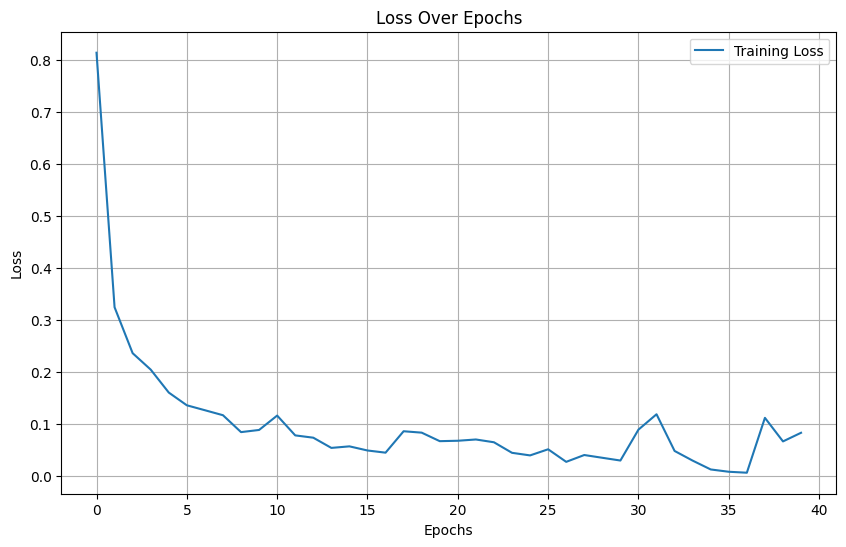

In [ ]:
# YOUR CODE GOES HERE

# Extract the training and validation loss
train_loss = history.history['loss']

# Plot the training and validation loss
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

#### Prediction
To make a prediction, use Keras `predict`. Below, X[1015] contains an image of a two.

In [ ]:
def display_digit(X):
    """ display a single digit. The input is one digit (400,). """
    fig, ax = plt.subplots(1,1, figsize=(0.5,0.5))
    X_reshaped = X.reshape((20,20)).T
    # Display the image
    ax.imshow(X_reshaped, cmap='gray')
    plt.show()

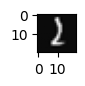

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
 predicting a Two: 
[[ -4.597386   -6.449034    4.8057046   1.8587546 -18.555988   -7.273699
  -16.785765   -6.822416  -10.40716    -7.174316 ]]
 Largest Prediction index: 2


In [ ]:
image_of_two = X[1015]
display_digit(image_of_two)

prediction = modelTF.predict(image_of_two.reshape(1,400))  # prediction

print(f" predicting a Two: \n{prediction}")
print(f" Largest Prediction index: {np.argmax(prediction)}")

The largest output is prediction[2], indicating the predicted digit is a '2'. If the problem only requires a selection, that is sufficient. Use NumPy [argmax](https://numpy.org/doc/stable/reference/generated/numpy.argmax.html) to select it. If the problem requires a probability, a softmax is required:

In [ ]:
prediction_p = tf.nn.softmax(prediction)

print(f" predicting a Two. Probability vector: \n{prediction_p}")
print(f"Total of predictions: {np.sum(prediction_p):0.3f}")

 predicting a Two. Probability vector: 
[[7.8346515e-05 1.2298695e-05 9.5001394e-01 4.9875341e-02 6.7900956e-11
  5.3915292e-06 3.9872569e-10 8.4664516e-06 2.3489140e-07 5.9548825e-06]]
Total of predictions: 1.000


To return an integer representing the predicted target, you want the index of the largest probability. This is accomplished with the Numpy [argmax](https://numpy.org/doc/stable/reference/generated/numpy.argmax.html) function.

In [ ]:
yhat = np.argmax(prediction_p)

print(f"np.argmax(prediction_p): {yhat}")

# Number of correctly classified samples
pred = modelTF.predict(X)
Yhat = np.argmax(pred, axis=1)
print('Number of correctly classified sameple of 5000', np.sum(Yhat==y[:,0]))

np.argmax(prediction_p): 2
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Number of correctly classified sameple of 5000 4950


Let's compare the predictions vs the labels for a random sample of 64 digits.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━

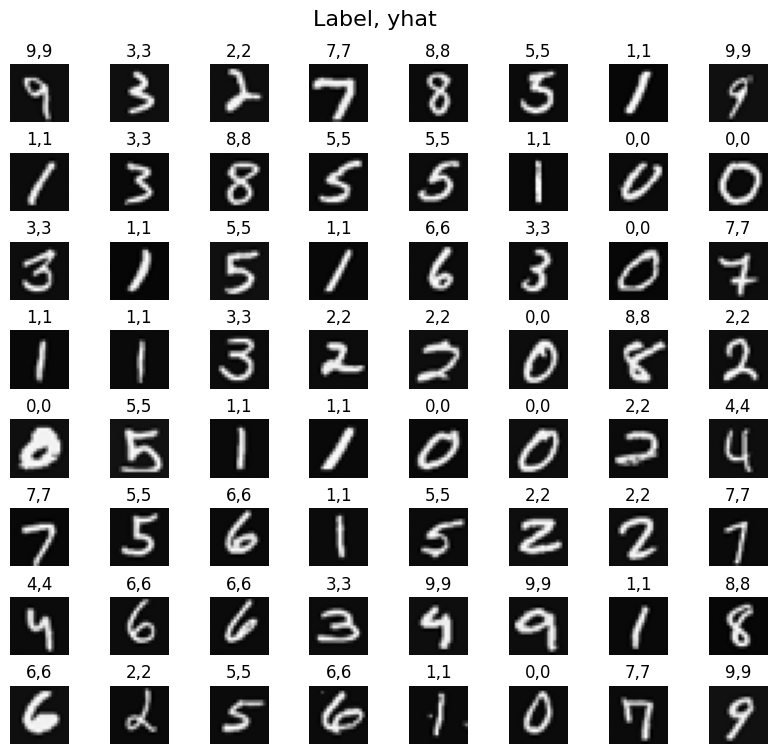

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1,rect=[0, 0.03, 1, 0.92]) #[left, bottom, right, top]

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)

    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T

    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')

    # Predict using the Neural Network
    prediction = modelTF.predict(X[random_index].reshape(1,400))
    prediction_p = tf.nn.softmax(prediction)
    yhat = np.argmax(prediction_p)

    # Display the label above the image
    ax.set_title(f"{y[random_index,0]},{yhat}")
    ax.set_axis_off()
fig.suptitle("Label, yhat", fontsize=16)
plt.show()

<a name="2.5"></a>

### 2.5 Pytorch Model Implementation

<a name="ex04"></a>
### Exercise 4

Construct the network described in section 2.4 using the pytorch library.

In [ ]:
import torch
import torch.nn as nn

class DigitRecognitionNet(nn.Module):
    def __init__(self):
        super(DigitRecognitionNet, self).__init__()
        # YOUR CODE GOES HERE
        # Define the layers
        self.layer1 = nn.Linear(400, 25)
        self.layer2 = nn.Linear(25, 15)
        self.layer3 = nn.Linear(15, 10)

        # Activation functions
        self.relu = nn.ReLU()

    def forward(self, x):
       # Forward pass through the network
        x = self.relu(self.layer1(x))
        x = self.relu(self.layer2(x))
        x = self.layer3(x)
        return x
        # YOUR CODE GOES HERE


In [ ]:
from torchsummary import summary
model = DigitRecognitionNet ()
summary(model, input_size=(1, 400))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                [-1, 1, 25]          10,025
              ReLU-2                [-1, 1, 25]               0
            Linear-3                [-1, 1, 15]             390
              ReLU-4                [-1, 1, 15]               0
            Linear-5                [-1, 1, 10]             160
Total params: 10,575
Trainable params: 10,575
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.04
Estimated Total Size (MB): 0.04
----------------------------------------------------------------


<details>
  <summary><font size="3" color="darkblue"><b>Expected Output (Click to Expand) </b></font></summary>
The `summary()` function from torchsummary displays a useful summary of the model. Because we have specified an input layer size, the shape of the weight and bias arrays are determined and the total number of parameters per layer can be shown.  
    
    
```
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
================================================================
            Linear-1                [-1, 1, 25]          10,025
              ReLU-2                [-1, 1, 25]               0
            Linear-3                [-1, 1, 15]             390
              ReLU-4                [-1, 1, 15]               0
            Linear-5                 [-1, 1, 1]             160
           Sigmoid-6                 [-1, 1, 1]               0
================================================================
Total params: 10,575
Trainable params: 10,575
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.04
Estimated Total Size (MB): 0.04
----------------------------------------------------------------
```

The parameter counts shown in the summary correspond to the number of elements in the weight and bias arrays as shown below.

In [ ]:
L1_num_params = 400 * 25 + 25  # W1 parameters  + b1 parameters
L2_num_params = 25 * 15 + 15   # W2 parameters  + b2 parameters
L3_num_params = 15 * 10 + 10     # W3 parameters  + b3 parameters
print("L1 params = ", L1_num_params, ", L2 params = ", L2_num_params, ",  L3 params = ", L3_num_params )

L1 params =  10025 , L2 params =  390 ,  L3 params =  160


Let's further examine the weights to verify that tensorflow produced the same dimensions as we calculated above.

In [ ]:
# Access weights and biases for each layer
W1, b1 = model.layer1.weight, model.layer1.bias
W2, b2 = model.layer2.weight, model.layer2.bias
W3, b3 = model.layer3.weight, model.layer3.bias

# Print shapes of weights and biases
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

W1 shape = torch.Size([25, 400]), b1 shape = torch.Size([25])
W2 shape = torch.Size([15, 25]), b2 shape = torch.Size([15])
W3 shape = torch.Size([10, 15]), b3 shape = torch.Size([10])


**Expected Output**
```
W1 shape = torch.Size([25, 400]), b1 shape = torch.Size([25])
W2 shape = torch.Size([15, 25]), b2 shape = torch.Size([15])
W3 shape = torch.Size([10, 15]), b3 shape = torch.Size([10])
```



`model.layerx.weight.data` returns a tensor.

In [ ]:
print(model.layer3.weight.data)

tensor([[-0.0797,  0.0927,  0.0714,  0.0371, -0.1553, -0.1839,  0.1622,  0.2123,
         -0.0432,  0.0339,  0.1605,  0.1023, -0.2237, -0.1207,  0.0661],
        [ 0.0841, -0.2160,  0.2414,  0.2404,  0.0017, -0.0739, -0.1144, -0.0596,
          0.1134, -0.2049, -0.0645,  0.0939,  0.0388, -0.0908, -0.1807],
        [ 0.0488,  0.1764, -0.0127,  0.0182, -0.2376, -0.1364,  0.1735, -0.1672,
          0.2435, -0.0025,  0.1732, -0.0623,  0.0645, -0.1454, -0.2154],
        [-0.1196, -0.1106,  0.2146, -0.1180,  0.0317, -0.1784, -0.1632,  0.2557,
         -0.2033,  0.0283, -0.2172,  0.2183, -0.0406,  0.1255,  0.1183],
        [-0.0264,  0.2139,  0.1953,  0.0339, -0.1228,  0.1385,  0.0515,  0.2497,
          0.0025, -0.1629,  0.1690, -0.0561, -0.1442,  0.0333, -0.0006],
        [-0.0108, -0.0410,  0.0647,  0.0806, -0.2267, -0.0207,  0.2064, -0.0930,
         -0.1698,  0.1809,  0.0981,  0.0033,  0.0752, -0.0310, -0.1489],
        [ 0.1820, -0.2011,  0.2572, -0.1687, -0.0253,  0.0009, -0.0419, -0.1

<a name="ex05"></a>
### Exercise 5

Train your model using the cross entropy loss and Adam optimizer with lr=0.001 for 40 epochs. Then, test the impact of:


*   The optimizer.
*   The learning rate.

In [ ]:
import torch.optim as optim

# Convert data to PyTorch tensors if they are NumPy arrays
X = torch.tensor(X, dtype=torch.float32)  # Input features as float32
y = torch.tensor(y, dtype=torch.long)     # Labels as long (integer type)

torch_train_loss = []
# Ensure y is a 1D tensor
y = y.squeeze()  # Remove any extra dimensions

# Define the loss function (CrossEntropyLoss for multi-class classification)
criterion = nn.CrossEntropyLoss()

# Define the optimizer (Adam with learning rate 0.001)
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 40
model.train()
for epoch in range(epochs):
     # Set the model to training mode

    # Forward pass
    outputs = model(X)  # X is now a PyTorch tensor
    loss = criterion(outputs, y)  # y is now a PyTorch tensor of shape (batch_size,)

    # Backward pass and optimization
    optimizer.zero_grad()  # Clear gradients
    loss.backward()        # Compute gradients
    optimizer.step()       # Update weights
    # Save the loss value for plotting
    torch_train_loss.append(loss.item())
    # Print progress
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

Epoch [1/40], Loss: 2.3114
Epoch [2/40], Loss: 2.3054
Epoch [3/40], Loss: 2.2994
Epoch [4/40], Loss: 2.2935
Epoch [5/40], Loss: 2.2874
Epoch [6/40], Loss: 2.2809
Epoch [7/40], Loss: 2.2738
Epoch [8/40], Loss: 2.2662
Epoch [9/40], Loss: 2.2581
Epoch [10/40], Loss: 2.2495
Epoch [11/40], Loss: 2.2404
Epoch [12/40], Loss: 2.2307
Epoch [13/40], Loss: 2.2206
Epoch [14/40], Loss: 2.2099
Epoch [15/40], Loss: 2.1987
Epoch [16/40], Loss: 2.1871
Epoch [17/40], Loss: 2.1749
Epoch [18/40], Loss: 2.1621
Epoch [19/40], Loss: 2.1489
Epoch [20/40], Loss: 2.1352
Epoch [21/40], Loss: 2.1209
Epoch [22/40], Loss: 2.1061
Epoch [23/40], Loss: 2.0907
Epoch [24/40], Loss: 2.0748
Epoch [25/40], Loss: 2.0584
Epoch [26/40], Loss: 2.0415
Epoch [27/40], Loss: 2.0241
Epoch [28/40], Loss: 2.0062
Epoch [29/40], Loss: 1.9879
Epoch [30/40], Loss: 1.9690
Epoch [31/40], Loss: 1.9498
Epoch [32/40], Loss: 1.9301
Epoch [33/40], Loss: 1.9100
Epoch [34/40], Loss: 1.8896
Epoch [35/40], Loss: 1.8687
Epoch [36/40], Loss: 1.8476
E

**Were the losses obtained in your implementation comparable to those of the TensorFlow model?** If not, what are the potential factors contributing to this discrepancy, and what steps can be taken to align the results with those achieved in the TensorFlow implementation?


In [ ]:
# YOUR CODE GOES HERE
# Final training loss for TensorFlow
tf_final_loss = history.history['loss'][-1]  # Last value in TensorFlow's loss list

# Final training loss for PyTorch
torch_final_loss = torch_train_loss[-1]  # Last value in PyTorch's loss list

# Print the comparison
print(f"TensorFlow Final Training Loss: {tf_final_loss:.4f}")
print(f"PyTorch Final Training Loss: {torch_final_loss:.4f}")

# Check if the losses are close
if abs(tf_final_loss - torch_final_loss) < 0.01:
    print("The losses are comparable.")
else:
    print("The losses differ significantly. Investigate potential factors.")

TensorFlow Final Training Loss: 0.0833
PyTorch Final Training Loss: 1.7601
The losses differ significantly. Investigate potential factors.


<a name="ex06"></a>
### Exercise 6 (cost)
Save the loss then examine it in a plot. What do you observe?

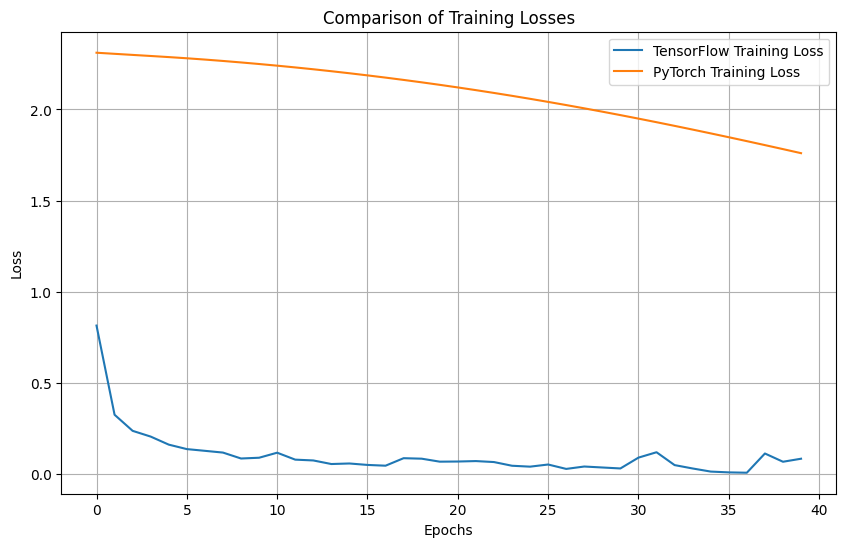

In [ ]:
# YOUR CODE GOES HERE
import matplotlib.pyplot as plt

# Assuming `tf_train_loss` and `torch_train_loss` are lists of losses from TensorFlow and PyTorch
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='TensorFlow Training Loss')
plt.plot(torch_train_loss, label='PyTorch Training Loss')
plt.title('Comparison of Training Losses')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

<ipython-input-126-574f60ebf644>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_tensor = torch.tensor(X, dtype=torch.float32)  # Input features as float32


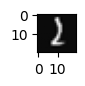

Predicting a Two: 
[[-0.21093388  0.1473484   0.24121007  0.03293552 -0.11257217  0.00339018
   0.2618869  -0.01514561  0.2497738  -0.26274037]]
Largest Prediction index: 6


In [ ]:
# Convert X to a PyTorch tensor if not already done
X_tensor = torch.tensor(X, dtype=torch.float32)  # Input features as float32
model.eval()

# Select the image of a "two"
image_of_two = X[1015]
display_digit(image_of_two)

# Make a prediction
with torch.no_grad():  # Disable gradient tracking
    prediction = model(X_tensor[1015].reshape(1, 400))  # Reshape to (1, 400) for batch size 1

# Convert the prediction to a NumPy array
prediction_np = prediction.detach().numpy()

# Print the raw prediction
print(f"Predicting a Two: \n{prediction_np}")

# Get the predicted class index
predicted_class = np.argmax(prediction_np)
print(f"Largest Prediction index: {predicted_class}")

The largest output is prediction[2], indicating the predicted digit is a '2'. If the problem only requires a selection, that is sufficient. Use NumPy [argmax](https://numpy.org/doc/stable/reference/generated/numpy.argmax.html) to select it. If the problem requires a probability, a softmax is required:

In [ ]:
prediction_p = tf.nn.softmax(prediction_np)

print(f" predicting a Two. Probability vector: \n{prediction_p}")
print(f"Total of predictions: {np.sum(prediction_p):0.3f}")

 predicting a Two. Probability vector: 
[[0.07706177 0.11026534 0.1211163  0.09834451 0.08502702 0.09548139
  0.12364668 0.09372787 0.12215797 0.07317112]]
Total of predictions: 1.000


To return an integer representing the predicted target, you want the index of the largest probability. This is accomplished with the Numpy [argmax](https://numpy.org/doc/stable/reference/generated/numpy.argmax.html) function.

In [ ]:
import torch.nn.functional as F  # For softmax

# Disable gradient tracking
with torch.no_grad():
    logits = model(X_tensor)  # Get raw logits from the model
    probabilities = F.softmax(logits, dim=1)  # Apply softmax to get probabilities
    Yhat = np.argmax(probabilities.numpy(), axis=1)  # Get predicted class indices

# Convert the prediction to a NumPy array
prediction_np = probabilities.detach().numpy()

# Ensure y is a NumPy array
if isinstance(y, torch.Tensor):
    y = y.numpy()

# Number of correctly classified samples
correct = np.sum(Yhat == y)  # Compare Yhat with y directly
print('Number of correctly classified samples:', correct)

Number of correctly classified samples: 2759


Let's compare the predictions vs the labels for a random sample of 64 digits.

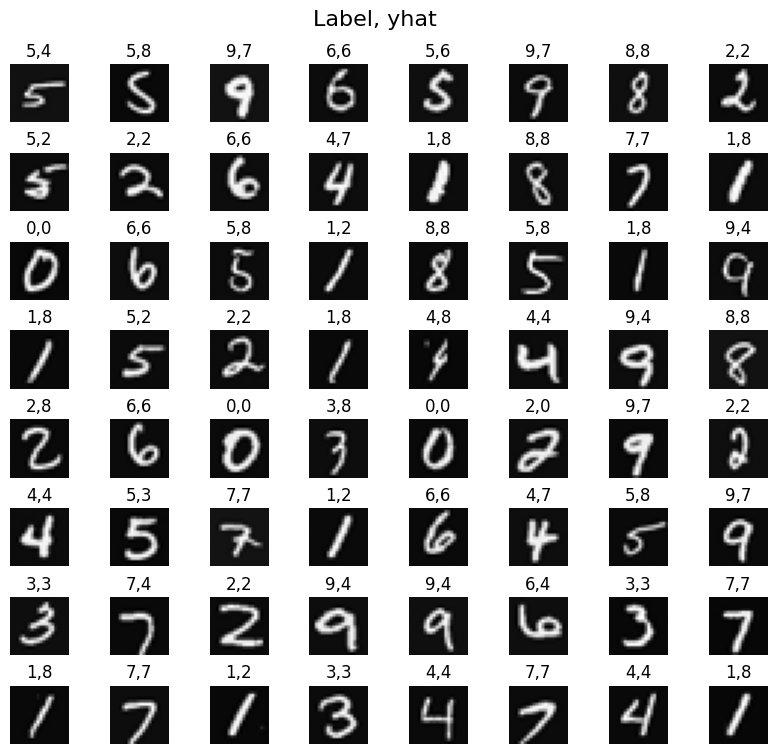

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X.shape

fig, axes = plt.subplots(8, 8, figsize=(8, 8))
fig.tight_layout(pad=0.1, rect=[0, 0.03, 1, 0.92])  # [left, bottom, right, top]

for i, ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)

    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20, 20)).T

    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')

    # Predict using the Neural Network
    yhat = np.argmax(prediction_np[random_index])

    # Display the label above the image
    ax.set_title(f"{y[random_index]},{yhat}")  # Fixed indexing for 1D array
    ax.set_axis_off()

fig.suptitle("Label, yhat", fontsize=16)
plt.show()

<a name="2.6"></a>
### 2.6 NumPy Model Implementation (Forward Prop in NumPy)
The goal here is to build your own dense layer using NumPy. This can then be utilized to build a multi-layer neural network.



<a name="ex07"></a>
### Exercise 7

Build a dense layer subroutine that uses vectorized implementation of the forward prop step.

In [ ]:
import numpy as np

def my_dense(A_in, W, b, g):
    """
    Computes dense layer
    Args:
      A_in (ndarray (m,n)) : Data, m examples, n features each
      W    (ndarray (n,j)) : Weight matrix, n features per unit, j units
      b    (ndarray (1,j)) : bias vector, j units
      g    activation function (e.g., sigmoid, relu..)
    Returns:
      A_out (ndarray (m,j)) : m examples, j units
    """
    ### START CODE HERE ###

    # Step 1: Matrix multiplication of A_in and W
    Z = np.matmul(A_in, W) + b  # Shape: (m, j)

    # Step 2: Apply the activation function g
    A_out = g(Z)  # Apply activation function element-wise

    ### END CODE HERE ###

    return A_out

In [ ]:
def softmax(z):
    """
    Compute the softmax of a vector z.

    Args:
        z (numpy array): Input vector of raw scores (logits).

    Returns:
        numpy array: Probability distribution after applying softmax.
    """
    # Subtract the max value for numerical stability
    exp_z = np.exp(z - np.max(z))
    return exp_z / np.sum(exp_z)

In [ ]:
def relu(z):
    """
    Compute the Rectified Linear Unit (ReLU) of z.

    Args:
        z (ndarray): A scalar, numpy array of any size.

    Returns:
        g (ndarray): relu(z), with the same shape as z.
                     ReLU is defined as g = max(0, z).
    """

    g = np.maximum(0, z)
    return g

In [ ]:
def linear(z):

    return z

<a name="ex08"></a>
### Exercise 8

Complete the following function to build a 3-layer dense neural network. The function should take as input the initial input x, weight matrices W1, W2, W3, bias vectors b1, b2, b3, and apply the my_dense function with a sigmoid activation at each layer. Return the final output of the network.

In [ ]:
def my_sequential(X, W1, b1, W2, b2, W3, b3):
    """
    Builds a 3-layer dense neural network using the my_dense function.

    Args:
      X (ndarray (m,n)) : Input data, m examples, n features each
      W1 (ndarray (n,j1)): Weight matrix for the first layer, n features per unit, j1 units
      b1 (ndarray (1,j1)): Bias vector for the first layer, j1 units
      W2 (ndarray (j1,j2)): Weight matrix for the second layer, j1 inputs, j2 units
      b2 (ndarray (1,j2)): Bias vector for the second layer, j2 units
      W3 (ndarray (j2,j3)): Weight matrix for the third layer, j2 inputs, j3 units
      b3 (ndarray (1,j3)): Bias vector for the third layer, j3 units

    Returns:
      A3 (ndarray (m,j3)) : Output of the third layer, m examples, j3 units
    """
    # Define the sigmoid activation function
    def sigmoid(z):
        return 1 / (1 + np.exp(-z))

    # YOUR CODE STARTS HERE

    # First layer
    A1 = my_dense(X, W1, b1, relu)

    # Second layer
    A2 = my_dense(A1, W2, b2, relu)

    # Third layer
    A3 = my_dense(A2, W3, b3, linear)

    # YOUR CODE ENDS HERE

    return A3

We can copy trained weights and biases from Tensorflow.

In [ ]:
W1_tmp,b1_tmp = layer1.get_weights()
W2_tmp,b2_tmp = layer2.get_weights()
W3_tmp,b3_tmp = layer3.get_weights()

Let's make a prediction with the new model. This will make a prediction on *all of the examples at once*. Note the shape of the output.

In [ ]:
# Compute logits using the NumPy implementation
Logit = my_sequential(X, W1_tmp, b1_tmp, W2_tmp, b2_tmp, W3_tmp, b3_tmp)
trueLogits = modelTF.predict(X)

# Convert Logit to a NumPy array before comparison
Logit_np = Logit.detach().cpu().numpy()

if np.sum(Logit_np - trueLogits > 1e-4) == 0:
  print("Test passed")
else:
  print("Test not passed")

 32/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

<ipython-input-130-596c4f1458d1>:17: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  Z = np.matmul(A_in, W) + b  # Shape: (m, j)
<ipython-input-132-a782080abbe7>:13: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  g = np.maximum(0, z)


157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Test passed


We first apply a softmax on the obtained logits followed by an argmax to get all predictions at once.

In [ ]:
Prediction = softmax(Logit)

Yhat = np.argmax(Prediction, axis=1)
print("predict a zero: ",Yhat[0], "predict a two: ", Yhat[1015])

TypeError: max() received an invalid combination of arguments - got (out=NoneType, axis=NoneType, ), but expected one of:
 * ()
 * (Tensor other)
 * (int dim, bool keepdim = False)
      didn't match because some of the keywords were incorrect: out, axis
 * (name dim, bool keepdim = False)
      didn't match because some of the keywords were incorrect: out, axis


In [ ]:
# Number of correctly classified samples
print('Number of correctly classified samples of 5000 is:', np.sum(Yhat == y))

Run the following cell to see predictions. This will use the predictions we just calculated above.

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X.shape

fig, axes = plt.subplots(8, 8, figsize=(8, 8))
fig.tight_layout(pad=0.1, rect=[0, 0.03, 1, 0.92]) #[left, bottom, right, top]

for i, ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)

    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20, 20)).T

    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')

    # Display the label above the image
    ax.set_title(f"{y[random_index]}, {Yhat[random_index]}")  # Fixed indexing for 1D array
    ax.set_axis_off()

fig.suptitle("Label, Yhat", fontsize=16)
plt.show()